In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
from sklearn.preprocessing import LabelEncoder


In [8]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [11]:
df_train=pd.read_csv('Desktop/train.csv') #loading of the training data set
df_test=pd.read_csv('Desktop/test.csv') #loading of the testing data set


In [12]:
df_train.head(5)
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


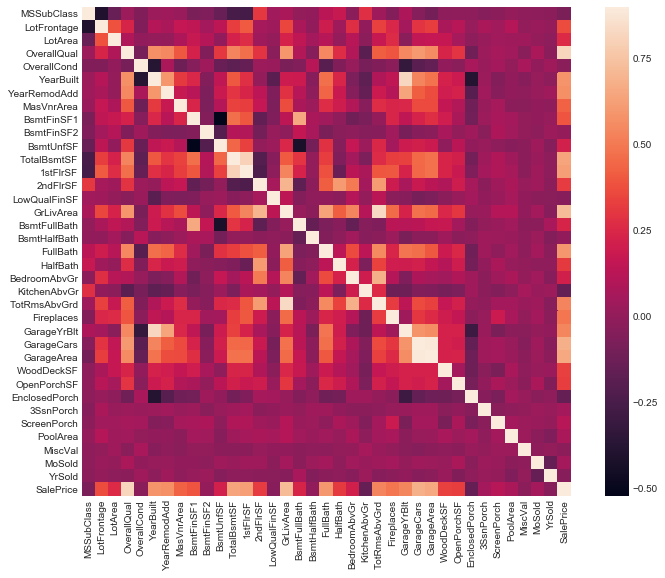

In [54]:
#Plotting the correlation map and checking the correlation of SalesPrice with the other columns values
correlation = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(correlation, vmax=0.9, square=True)

In [20]:
#dropping the id column from both training and testing dataset
print("dimenshion of  the training dataset : {}".format(df_train.shape))
print("dimenshion of  the testing dataset : {}".format(df_test.shape))


dimenshion of  the training dataset : (1460, 81)
dimenshion of  the testing dataset : (1459, 80)


In [24]:
#saving the ids for fututre reference
train_id=df_train['Id']
test_id=df_test['Id']

In [25]:
#dropping the id column as it is of  no use
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

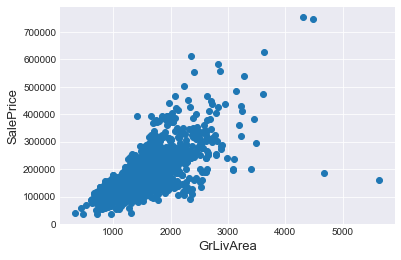

In [28]:
#checking for any ouliers if present int the dataset
#plotting the scatter plot between givenArea of the ground Vs the sales price
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


# From the above graph we can conclude that the two bottom right points are outliers and that needd to be removed because for the very low sales price having high land area

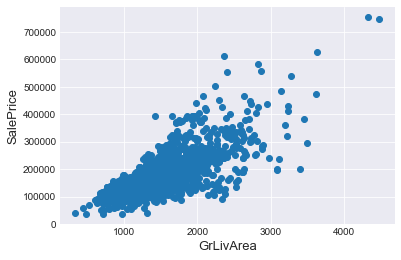

In [33]:
#Deleting outliers from the dataset
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#plotting the graph again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

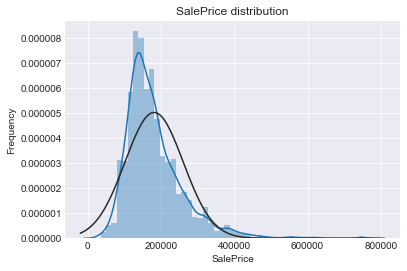

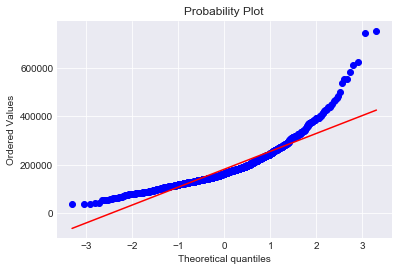

In [36]:
#plotting the distribution chart (histogram) for the sales price present in the data set
sns.distplot(df_train['SalePrice'] , fit=norm);

'''# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))'''



plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


# we can conclude from the above histogram that the data of the salesPrice is little skewed and hence affecting the probaility distribution graph too

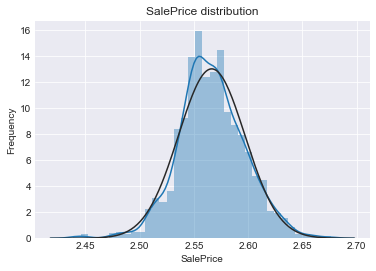

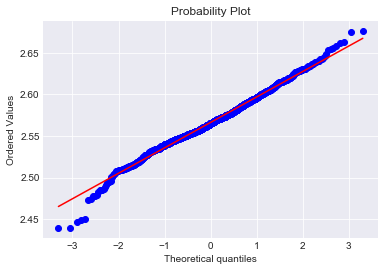

In [43]:
#We use the numpy fuction log1p  to remove the right-skewness from the salesprice column

df_train["SalePrice"]= np.log1p(df_train["SalePrice"])

#Checking  new distribution after the removal of skewness
sns.distplot(df_train["SalePrice"] , fit=norm);

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#probability distribution for the new distribution form
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

# Feature engineering  on both the datasets 

In [55]:
#COncatenation of both training and testing dataset
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
combined_data = pd.concat((df_train, df_test)).reset_index(drop=True)
combined_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(combined_data.shape))

all_data size is : (2917, 79)


In [56]:
#finding the ratio of the missing data values in the both datasets
all_data_na = (combined_data.isnull().sum() / len(combined_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5,1,'Percent missing data by feature')

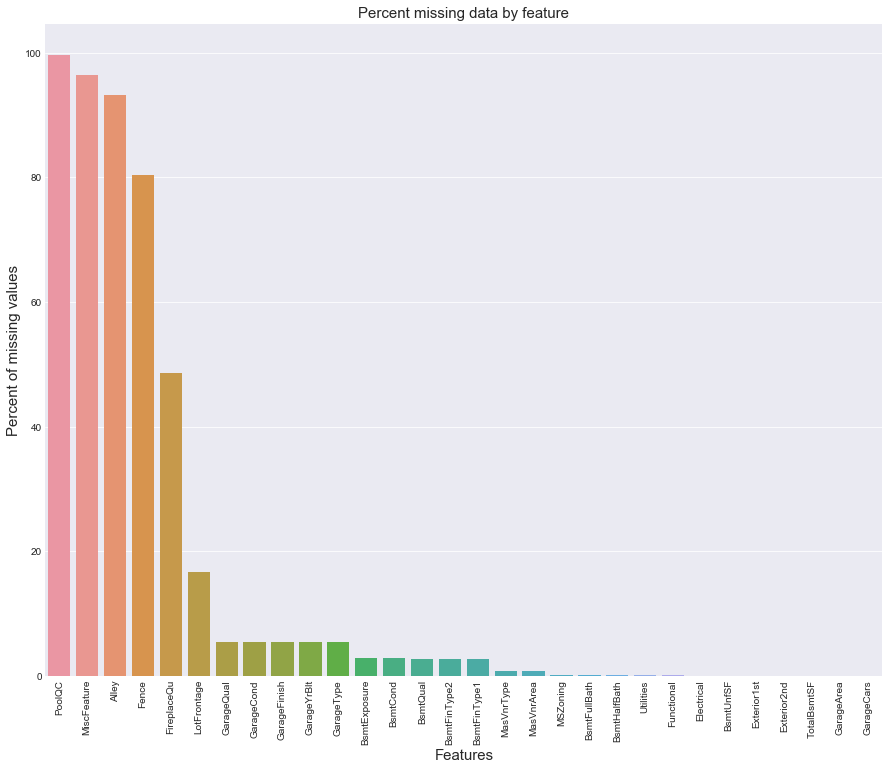

In [68]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
#lets plot the percentage of the column that are hving missing values in their field

face, axis = plt.subplots(figsize=(15, 12))
#plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# now lets fill up the missing value in the combined dataSet

In [57]:
#PoolQC : data description says NA means "No Pool". that means majority of the houses does not provide the pooling facility
combined_data["PoolQC"] = combined_data["PoolQC"].fillna("None")

In [58]:
#FOR Alley column : data  says NA means "no alley access"
combined_data["Alley"] = combined_data["Alley"].fillna("None")

In [59]:
#FOR Fence column : data  says NA means "no fence"
combined_data["Fence"] = combined_data["Fence"].fillna("None")


#FOR FireplaceQu column : data  says NA means "no fireplace"
combined_data["FireplaceQu"] = combined_data["FireplaceQu"].fillna("None")

In [61]:
"""FOR LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood ,
we can fill in missing values by the median LotFrontage of the neighborhood.
Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood , so placing the median value
to the NA """

combined_data["LotFrontage"] = combined_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [63]:
#GarageType, GarageFinish, GarageQual and GarageCond replacing missing values with None value
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    combined_data[col] = combined_data[col].fillna('None')

In [65]:
#GarageYrBlt, GarageArea and GarageCars Replacing missing values with 0 as it shows that No garage = no cars in such garage.
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combined_data[col] = combined_data[col].fillna(0)

In [66]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath -  missing values are probably zero for having no basement facility
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    combined_data[col] = combined_data[col].fillna(0)

In [67]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, inserting None value to the NaN or missing value 
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combined_data[col] = combined_data[col].fillna('None')

In [69]:
#MasVnrArea and MasVnrType : NA shows that no masonry veneer for these houses. We can fill 0 for the MasVnrArea and None for the MasVnrType.
combined_data["MasVnrType"] = combined_data["MasVnrType"].fillna("None")
combined_data["MasVnrArea"] = combined_data["MasVnrArea"].fillna(0)

#MSZoning ( general zonal classification) : 'RL' is by far the most common value. So we can fill the missing values with 'RL'
combined_data['MSZoning'] = combined_data['MSZoning'].fillna(combined_data['MSZoning'].mode()[0])

#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
combined_data = combined_data.drop(['Utilities'], axis=1)

In [71]:
#Electrical data value column: It has one NA value. Since this feature has mostly 'SBrkr'(Standard Circuit Breakers & Romex), hence we can set that valu against the missing value
combined_data['Electrical'] = combined_data['Electrical'].fillna(combined_data['Electrical'].mode()[0])


#KitchenQual data value column: As the column value has just one missing value, we  can use same concept as 'Electrical' column to replace the missing vaue with its mode() i.e TA
combined_data['KitchenQual'] = combined_data['KitchenQual'].fillna(combined_data['KitchenQual'].mode()[0])


# For Exterior1st and Exterior2nd column values : Both the columns has one missing values so we can replace the missing values with its corrosponding most frequent occurance of values
combined_data['Exterior1st'] = combined_data['Exterior1st'].fillna(combined_data['Exterior1st'].mode()[0])
combined_data['Exterior2nd'] = combined_data['Exterior2nd'].fillna(combined_data['Exterior2nd'].mode()[0])


#SaleType column values : Filling up the missing values with the most occurance of the values in the column "WD"
combined_data['SaleType'] = combined_data['SaleType'].fillna(combined_data['SaleType'].mode()[0])

In [72]:
#MSSubClass : NA the most occured value means No building class. We can replace missing values with None
combined_data['MSSubClass'] = combined_data['MSSubClass'].fillna("None")

# Let us perform some categorial data clean process on the dataset



In [74]:
#beigning the process with the textual categorial data

items = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for i in items:
    lbl = LabelEncoder() 
    lbl.fit(list(combined_data[i].values)) 
    combined_data[i] = lbl.transform(list(combined_data[i].values))

In [75]:
#cleaning the numberical data that have categorial functionality

combined_data['MSSubClass'] = combined_data['MSSubClass'].apply(str)

#The year and month in which the house is being sold are also a kind of the numerical categorial data that needed to be processed
combined_data['MoSold'] = combined_data['MoSold'].astype(str)
combined_data['YrSold'] = combined_data['YrSold'].astype(str)


#Changing OverallCond (over all rating of  the condition of the house) into a categorical variable
combined_data['OverallCond'] = combined_data['OverallCond'].astype(str)




In [76]:
"""#since the total price/ value of  the house is the cobined land area price of the plot so adding 
the total_basement_area + total_first_floor_area + total_second_floor area"""

combined_data['TotalSF'] = combined_data['TotalBsmtSF'] + combined_data['1stFlrSF'] + combined_data['2ndFlrSF']
